# Importing and Understanding Data

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
#Importing test and training data
digits_train = pd.read_csv(r"C:\Users\HasvithaSai\Desktop\IIITB\PredicitiveAnalysis2\svm\Assignment\train.csv")

In [3]:
digits_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
digits_train.shape

(42000, 785)

In [5]:
digits_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# missing values from each column
round(100*(digits_train.isnull().sum()/len(digits_train.index)),2)

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: floa

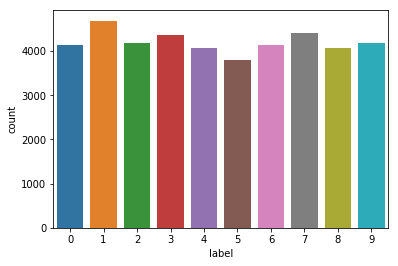

In [7]:
# label value count plot
sns.countplot(digits_train['label'])
plt.show()


In [8]:
# just value count print of train dataset
print(digits_train['label'].value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [9]:
# considering 10% data from original dataset

digits_train = digits_train.iloc[0:4200]

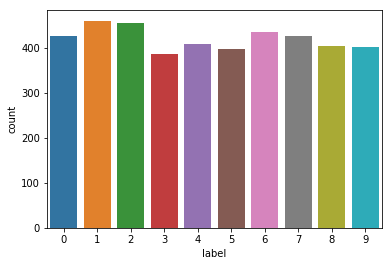

In [10]:
# label value count plot
sns.countplot(digits_train['label'])
plt.show()

In [11]:
# just value count print of train dataset
print(digits_train['label'].value_counts())

1    460
2    454
6    436
7    427
0    425
4    409
8    404
9    401
5    398
3    386
Name: label, dtype: int64


In [12]:
# splitting into X and y
X_tr = digits_train.drop("label", axis = 1)
y_tr = digits_train['label']

# Model Building

In [13]:

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size = 0.3, random_state = 101)

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

## SVM with Linear kernel (with pipeline object)

In [16]:
steps = [('scaler',StandardScaler()),('SVM',SVC(kernel='linear'))]
pipeline = Pipeline(steps) # define Pipeline object

In [17]:
parameters ={'SVM__C':[1, 10, 100],'SVM__gamma':[0.1, 0.01 , 0.001]}
grid =GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [18]:
grid.fit(X_train,y_train)
print("score =%3.2f"%(grid.score(X_test, y_test)))
print("best parameters from train data:",grid.best_params_)



score = 0.88
best parameters from train data:  {'SVM__C': 1, 'SVM__gamma': 0.1}


In [19]:
y_pred =grid.predict(X_test)

In [20]:
# We can check some of the predictions
print(y_pred[100:105])
print(y_test[100:105])

[6 2 2 9 7]
1263    6
2692    2
1230    2
2188    9
3649    7
Name: label, dtype: int64


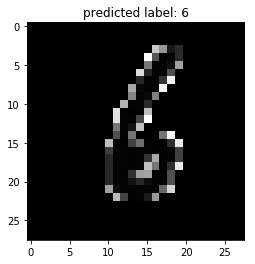

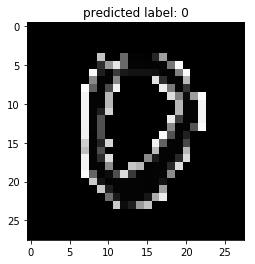

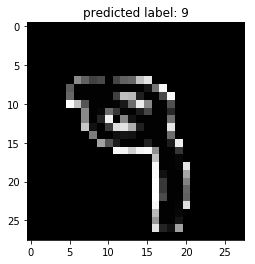

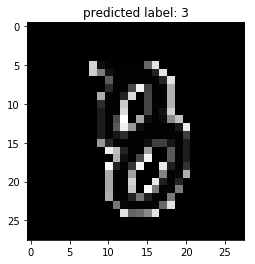

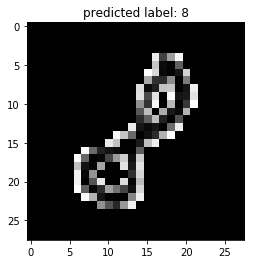

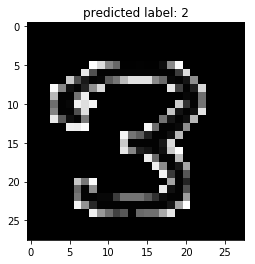

In [21]:
"""We can now plot the digits using python matplotlib pyplot imshow . 
We use the prediction list and the pixel values from the test list for comparison."""


for i in (np.random.randint(0,270,6)):
    two_d =(np.reshape(X_test.values[i],(28,28))*255).astype(np.uint8)
    plt.title('predicted label:{0}'.format(y_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")

# cm
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

accuracy: 0.8833333333333333 

[[125   0   0   0   0   0   1   0   0   1]
 [  0 121   1   1   0   1   1   1   1   0]
 [  1   6 122   3   0   0   3   3   1   0]
 [  2   1   8 114   0   7   0   0   5   1]
 [  0   0   0   0 123   0   0   1   0   5]
 [  0   3   1   5   1  94   4   1   1   0]
 [  3   1   2   0   2   2 120   0   0   0]
 [  0   0   3   1   5   1   0 109   1  10]
 [  1   1   4   8   1  10   0   2  99   2]
 [  2   0   0   2   6   3   0   3   0  86]]


### SVM with Linear kernel got 88% accuracy

#  Anthoer  Approch for linear svm (without pipeline object)

In [23]:
# linear model

model_linear =SVC(kernel='linear')
model_linear.fit(X_train,y_train)

# predict
y_pred =model_linear.predict(X_test)


In [24]:
# confusion matrix and accuracy

# accuracy
print("accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")

# cm
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

accuracy: 0.8984126984126984 

[[125   0   0   0   0   1   0   0   0   1]
 [  0 122   1   0   0   1   1   1   1   0]
 [  1   4 129   1   0   1   0   2   1   0]
 [  2   1   6 113   0  11   1   0   3   1]
 [  0   0   0   0 125   0   0   0   0   4]
 [  0   4   0   5   0 100   1   0   0   0]
 [  3   0   3   0   3   2 119   0   0   0]
 [  0   0   3   0   5   1   1 113   1   6]
 [  1   2   4  10   0   9   0   2  97   3]
 [  2   0   0   1   5   2   0   3   0  89]]


In [25]:
# We can check some of the predictions
print(y_pred[100:110])
print(y_test[100:110])

[6 2 2 9 7 5 7 6 7 9]
1263    6
2692    2
1230    2
2188    9
3649    7
589     5
126     7
1725    6
1757    7
1439    9
Name: label, dtype: int64


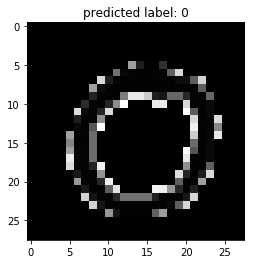

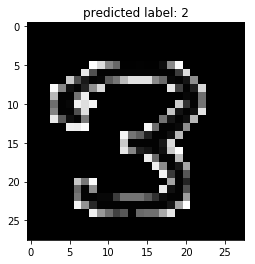

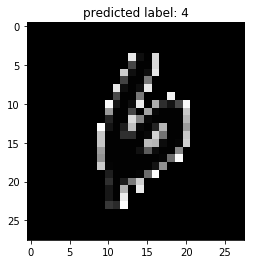

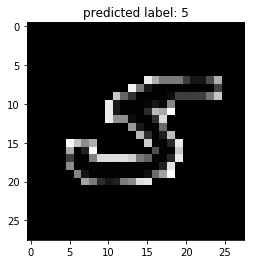

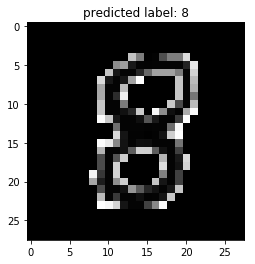

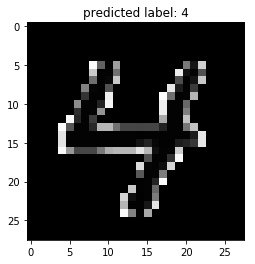

In [26]:
"""We can now plot the digits using python matplotlib pyplot imshow . 
We use the prediction list and the pixel values from the test list for comparison."""


for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i],(28,28))*255).astype(np.uint8)
    plt.title('predicted label:{0}'.format(y_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

### In linear SVM we got ~89% accuracy 

# SVM with poly kernel (polynomial)

In [27]:
steps =[('scaler', StandardScaler()),('SVM',SVC(kernel='poly'))]
pipeline =Pipeline(steps) # define Pipeline object

In [28]:
parameters = {'SVM__C':[1, 10, 100],'SVM__gamma':[0.1,0.01,0.001]}
grid =GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [29]:
grid.fit(X_train, y_train)
print("score = %3.2f"%(grid.score(X_test,y_test)))
print("best parameters from train data: ",grid.best_params_)



score = 0.92
best parameters from train data:  {'SVM__C': 1, 'SVM__gamma': 0.1}


In [30]:
y_pred = grid.predict(X_test)

In [31]:
# We can check some of the predictions
print(y_pred[100:105])
print(y_test[100:105])

[6 2 2 9 7]
1263    6
2692    2
1230    2
2188    9
3649    7
Name: label, dtype: int64


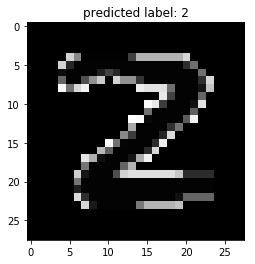

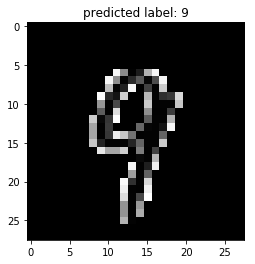

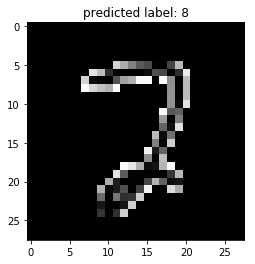

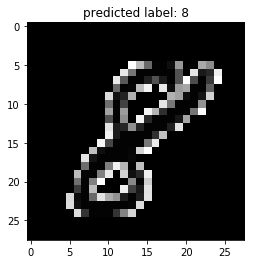

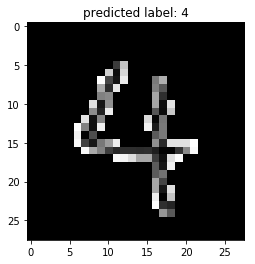

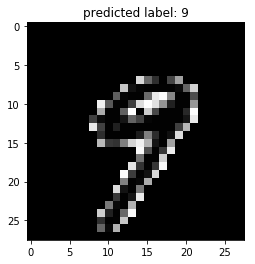

In [32]:
"""We can now plot the digits using python matplotlib pyplot imshow . 
We use the prediction list and the pixel values from the test list for comparison."""


for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i],(28,28)) * 255).astype(np.uint8)
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [33]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9206349206349206 

[[124   0   0   0   0   1   0   0   0   2]
 [  0 121   0   0   0   1   2   0   2   1]
 [  0   3 121   0   2   0   0   1  12   0]
 [  0   1   4 119   0   5   0   0   9   0]
 [  0   0   0   0 124   0   0   0   0   5]
 [  0   1   0   0   1 104   1   0   3   0]
 [  2   0   3   0   4   0 119   0   2   0]
 [  0   0   0   0   3   0   0 116   2   9]
 [  0   0   1   2   0   3   0   0 121   1]
 [  2   0   0   0   2   2   0   4   1  91]]


### SVM with polynomial kernel (poly) we got ~92% accuracy

# SVM with rbf Kernel

In [34]:
# scaling the features
X_scalednew =scale(X_tr)

# train test split
Xtrain_new,Xtest_new,ytrain_new, ytest_new =train_test_split(X_scalednew,y_tr,test_size = 0.3,random_state = 101)

In [36]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
nonlinearmodel=SVC(kernel='rbf')

# fit
nonlinearmodel.fit(Xtrain_new,ytrain_new)

# predict
yprednew=nonlinearmodel.predict(Xtest_new)

In [37]:
# confusion matrix and accuracy

# accuracy
print("accuracy:",metrics.accuracy_score(y_true=ytest_new,y_pred=yprednew), "\n")

# cm
print(metrics.confusion_matrix(y_true=ytest_new,y_pred=yprednew))

accuracy: 0.9119047619047619 

[[124   0   2   0   0   0   0   0   0   1]
 [  0 121   0   0   0   1   3   0   1   1]
 [  1   2 133   1   0   0   0   1   1   0]
 [  2   1  11 113   0   6   0   0   5   0]
 [  0   0   2   0 121   0   0   0   0   6]
 [  0   1   2   2   1 102   2   0   0   0]
 [  1   0   5   0   2   0 122   0   0   0]
 [  0   0   4   0   3   0   0 114   1   8]
 [  1   1   3   4   0   8   0   0 110   1]
 [  1   0   2   3   3   1   0   3   0  89]]


In [38]:
## Grid Search: Hyperparameter Tuning

In [39]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits =5, shuffle =True,random_state =101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma':[0.1, 0.01, 0.001],
                     'C':[1, 10, 100]}]


# specify model
model =SVC(kernel="rbf")

# set up GridSearchCV()
model_cv =GridSearchCV(estimator =model, 
                        param_grid =hyper_params, 
                        scoring='accuracy', 
                        cv =folds, 
                        verbose =1,
                        return_train_score=True)      

# fit the model
model_cv.fit(Xtrain_new,ytrain_new)                  


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 50.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [40]:
# cv results
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       35.181922      0.088659         4.143114        0.029628       1   
1       31.343040      0.218340         3.754403        0.018306       1   
2       10.913901      0.118577         2.690634        0.017743       1   
3       16.403847      0.117105         3.419712        0.015574       1   
4       35.870537      0.218054         4.145132        0.043057      10   
5       31.640653      0.311001         3.759987        0.014134      10   
6        9.528032      0.072488         2.503766        0.059098      10   
7        7.708776      0.085378         2.324124        0.020621      10   
8       35.861275      0.106015         4.157091        0.032215     100   
9       31.770510      0.177960         3.774802        0.031396     100   
10       9.495429      0.076561         2.503668        0.032677     100   
11       6.056283      0.099258         2.006237        0.040780     100   
12      35.631765      0.091444         4.157149        0.020692    1000   
13      31.710955      0.200389         3.761415        0.014118    1000   
14       9.447763      0.095893         2.489854        0.008436    1000   
15       6.016467      0.067376         2.012408        0.034433    1000   

   param_gamma                        params  split0_test_score  \
0          0.1        {'C': 1, 'gamma': 0.1}           0.161565   
1         0.01       {'C': 1, 'gamma': 0.01}           0.675170   
2        0.001      {'C': 1, 'gamma': 0.001}           0.889456   
3       0.0001     {'C': 1, 'gamma': 0.0001}           0.853741   
4          0.1       {'C': 10, 'gamma': 0.1}           0.164966   
5         0.01      {'C': 10, 'gamma': 0.01}           0.709184   
6        0.001     {'C': 10, 'gamma': 0.001}           0.914966   
7       0.0001    {'C': 10, 'gamma': 0.0001}           0.897959   
8          0.1      {'C': 100, 'gamma': 0.1}           0.164966   
9         0.01     {'C': 100, 'gamma': 0.01}           0.709184   
10       0.001    {'C': 100, 'gamma': 0.001}           0.914966   
11      0.0001   {'C': 100, 'gamma': 0.0001}           0.901361   
12         0.1     {'C': 1000, 'gamma': 0.1}           0.164966   
13        0.01    {'C': 1000, 'gamma': 0.01}           0.709184   
14       0.001   {'C': 1000, 'gamma': 0.001}           0.914966   
15      0.0001  {'C': 1000, 'gamma': 0.0001}           0.901361   

    split1_test_score  split2_test_score       ...         mean_test_score  \
0            0.159864           0.159864       ...                0.168027   
1            0.659864           0.681973       ...                0.681293   
2            0.901361           0.897959       ...                0.900680   
3            0.863946           0.857143       ...                0.862585   
4            0.168367           0.159864       ...                0.172789   
5            0.681973           0.698980       ...                0.703741   
6            0.908163           0.906463       ...                0.917687   
7            0.901361           0.904762       ...                0.910204   
8            0.168367           0.159864       ...                0.172789   
9            0.681973           0.698980       ...                0.703741   
10           0.906463           0.904762       ...                0.915646   
11           0.896259           0.904762       ...                0.912245   
12           0.168367           0.159864       ...                0.172789   
13           0.681973           0.698980       ...                0.703741   
14           0.906463           0.904762       ...                0.915646   
15           0.894558           0.906463       ...                0.909524   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.010506               16            1.000000            1.000000   
1         0.018772               12            1.000000            1.000000   
2      

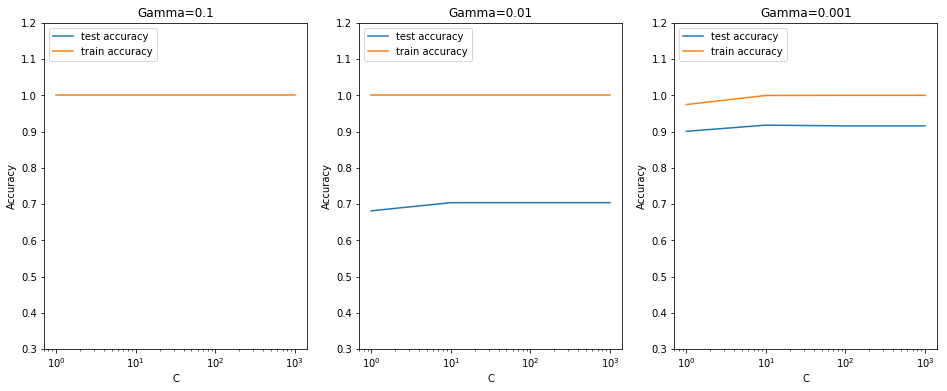

In [41]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] =cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 =cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"],gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"],gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.30, 1.2])
plt.legend(['test accuracy','train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 =cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"],gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"],gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.30, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 =cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_0001["param_C"],gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"],gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.30, 1.2])
plt.legend(['test accuracy','train accuracy'],loc='upper left')
plt.xscale('log')


In [42]:
# printing the optimal accuracy score and hyperparameters
best_score=model_cv.best_score_
best_hyperparams =model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score,best_hyperparams))

The best test score is 0.917687074829932 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [43]:
### Building and Evaluating the Final Model

In [45]:
# model with optimal hyperparameters

# model
model =SVC(C=10,gamma=0.001,kernel="rbf")


model.fit(Xtrain_new,ytrain_new)
yprednew =model.predict(Xtest_new)

# metrics
print("accuracy",metrics.accuracy_score(ytest_new,yprednew), "\n")
print(metrics.confusion_matrix(ytest_new,yprednew), "\n")



accuracy 0.9293650793650794 

[[126   0   1   0   0   0   0   0   0   0]
 [  0 121   0   1   0   1   2   1   1   0]
 [  1   1 134   0   0   0   0   2   1   0]
 [  0   1   9 119   0   4   0   1   4   0]
 [  0   0   0   0 127   0   0   0   0   2]
 [  0   1   0   3   0 103   2   1   0   0]
 [  3   0   2   0   2   2 121   0   0   0]
 [  0   0   3   0   2   1   0 119   1   4]
 [  1   1   4   5   0   6   0   0 110   1]
 [  1   0   1   2   2   2   0   3   0  91]] 



## Conclusion

The accuracy achieved using a non-linear rbf - kernel  (~0.93) is higher than that of a Non-linear one (~0.92) and Linear kernel (~89%). 


conclude that the problem is highly non-linear(rbf) in nature.